In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#load data
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [10]:
#describe first 3 columns
wine.iloc[:, :3].describe()
plt.show()


array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='total_phenols'>,
        <Axes: xlabel='total_phenols', ylabel='total_phenols'>]],
      dtype=object)

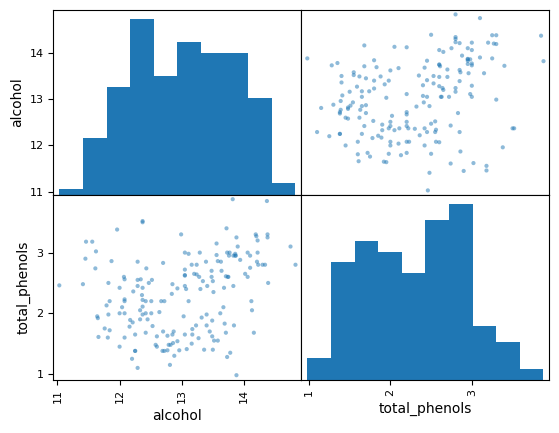

In [11]:
#scatter matrix
scatter_matrix(wine.iloc[:, [0,5]])

In [14]:
#test on alcohol and total_phenols
X = wine[['alcohol', 'total_phenols']]

#centrod based learning, so need normalization
scale = StandardScaler()
scale.fit(X)

print(scale.mean_) #mean
print(scale.scale_) #std


[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [15]:
#transform the data
X_scaled = scale.transform(X)

In [16]:
#model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int32)

In [17]:
#inspect centroid
kmeans.cluster_centers_

array([[ 0.12034104, -1.13862089],
       [ 0.86945315,  0.9029849 ],
       [-1.07317923, -0.04050538]])

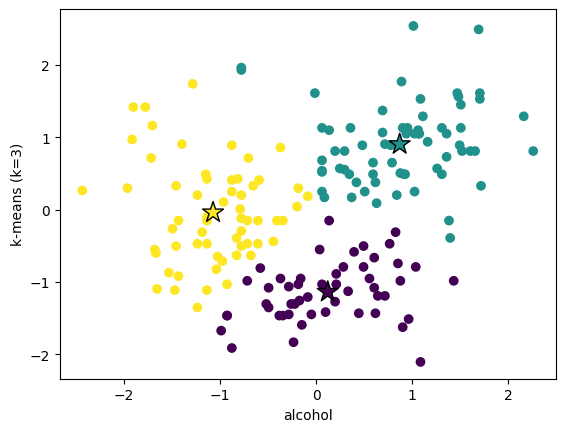

In [19]:
#visualising
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker="*",
            s = 250,
            c = [0,1,2],
            edgecolors='k')
plt.xlabel('alcohol')
plt.ylabel('k-means (k=3)')
plt.show()

In [23]:
#test
new = np.array([[13, 2.5]])
new_scaled = scale.transform(new)
kmeans.predict(new_scaled)

c:\Users\TYC\Desktop\python code\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
#check inertia (sum of squared distance from data point to nearest centroid)
kmeans = KMeans(n_clusters=2) #k=2
kmeans.fit(X_scaled)
kmeans.inertia_

185.2508154119013

In [ ]:
kmeans = KMeans(n_clusters=3) #k=3
kmeans.fit(X_scaled)
kmeans.inertia_

114.37290289645739

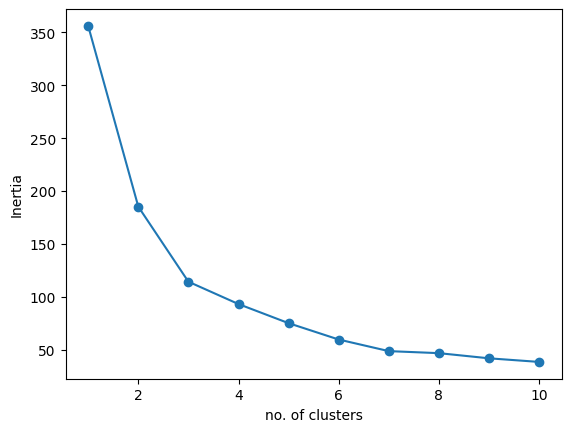

In [ ]:
#plot a range of values of k
inertia = []

for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('no. of clusters')
plt.ylabel('Inertia')
plt.show() #optimal k should be at the elbow

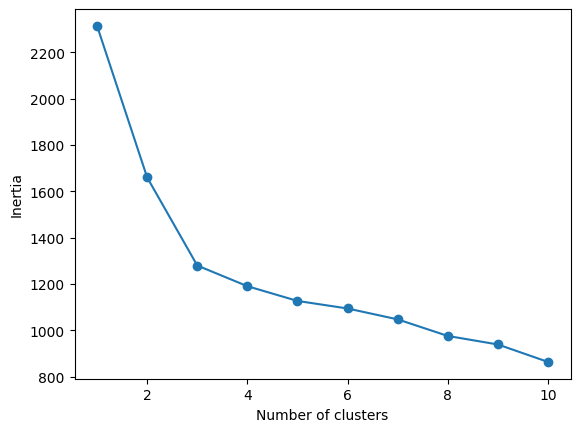

In [29]:
#use all wine feature
X = wine

#scaling
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

#inertia range plotting
inertia = []

for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)